In [59]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_probability as tfp

from causalimpact import CausalImpact

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Does your promo work? 
# Advanced Synthetic Control with `tfcausalimpcat`


Have you ever wondered how to measure the real impact of a marketing campaign or a social policy is not influenced by accidental factors? In the talk we’ll demonstrate how to leverage Bayesian structural time series model to estimate the causal effect of interventions using Python and TensorFlow Probability. We’ll discuss the advantages and limitations of this approach. By the end of the talk you will be able to apply the discussed methodology to your own problems.


A part of [CausalPython](https://causalpython.io) series on causality.

<a href="https://causalpython.io"><img src="img/CausalPython.io__flat.png" width=150 align="left"></a>
<br>

## Create the environment


To run this notebook use `causal-tf-env`.

To create: `conda env create -f causal-tf-env.yml`

## Get the data

### Read

In [78]:
data_file = './data/gt_social_media_data.csv'

In [79]:
data = pd.read_csv(data_file)

In [80]:
data

,date,twitter,linkedin,tiktok,instagram
0,2022-05-15,55,9,23,59
1,2022-05-16,54,18,20,59
2,2022-05-17,54,20,23,57
3,2022-05-18,54,20,21,55
4,2022-05-19,49,23,21,52
...,...,...,...,...,...
176,2022-11-07,66,18,23,50
177,2022-11-08,60,18,24,47
178,2022-11-09,64,18,21,45
179,2022-11-10,61,19,22,49


### Transform and visualize

In [81]:
data.index = pd.to_datetime(data['date'])
data = data.drop('date', axis=1)

In [82]:
data

,twitter,linkedin,tiktok,instagram
date,,,,
2022-05-15,55,9,23,59
2022-05-16,54,18,20,59
2022-05-17,54,20,23,57
2022-05-18,54,20,21,55
2022-05-19,49,23,21,52
...,...,...,...,...
2022-11-07,66,18,23,50
2022-11-08,60,18,24,47
2022-11-09,64,18,21,45


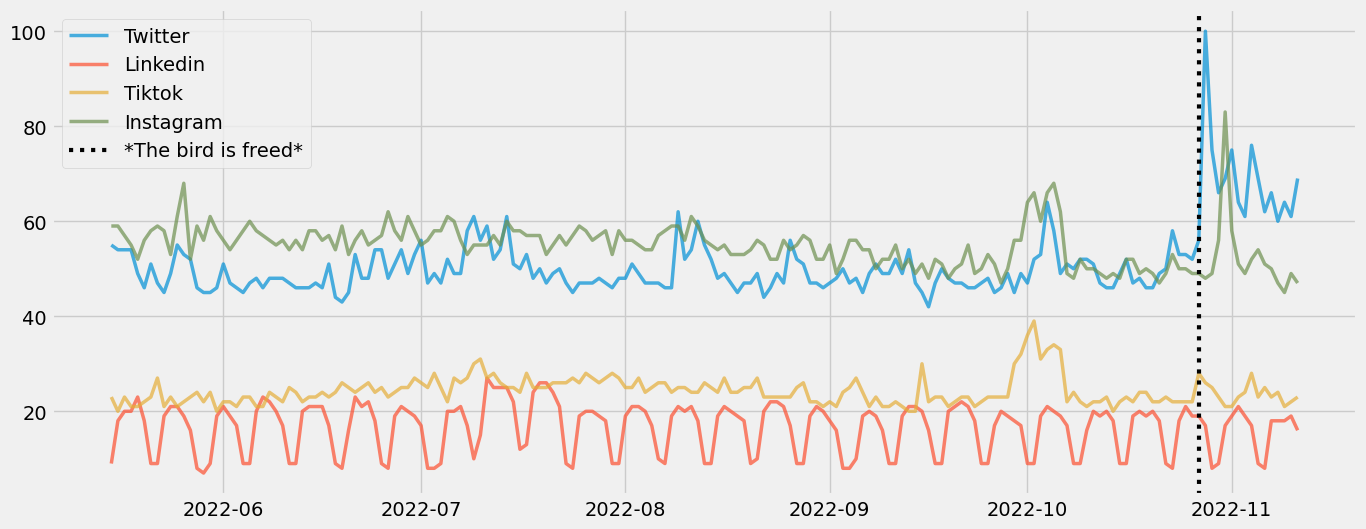

In [83]:
plt.figure(figsize=(15, 6))

for series in data.columns:
    plt.plot(data[series], label=series.title(), lw=2.5, alpha=.7)
    
plt.axvline(pd.to_datetime('2022-10-27'), color='black', lw=3, ls='dotted', label='*The bird is freed*')
plt.legend()
plt.show()

In [84]:
# Rename columns
data = data.rename(columns={
    'twitter': 'y',
    'linkedin': 'x0',
    'tiktok': 'x1',
    'instagram': 'x2'
})

## Model

### Using variational inference

In [71]:
# Define the periods
pre_period = ['20220515', '20221027']
post_period = ['20221028', '20221111']

# Fit the model
ci = CausalImpact(data, pre_period, post_period)

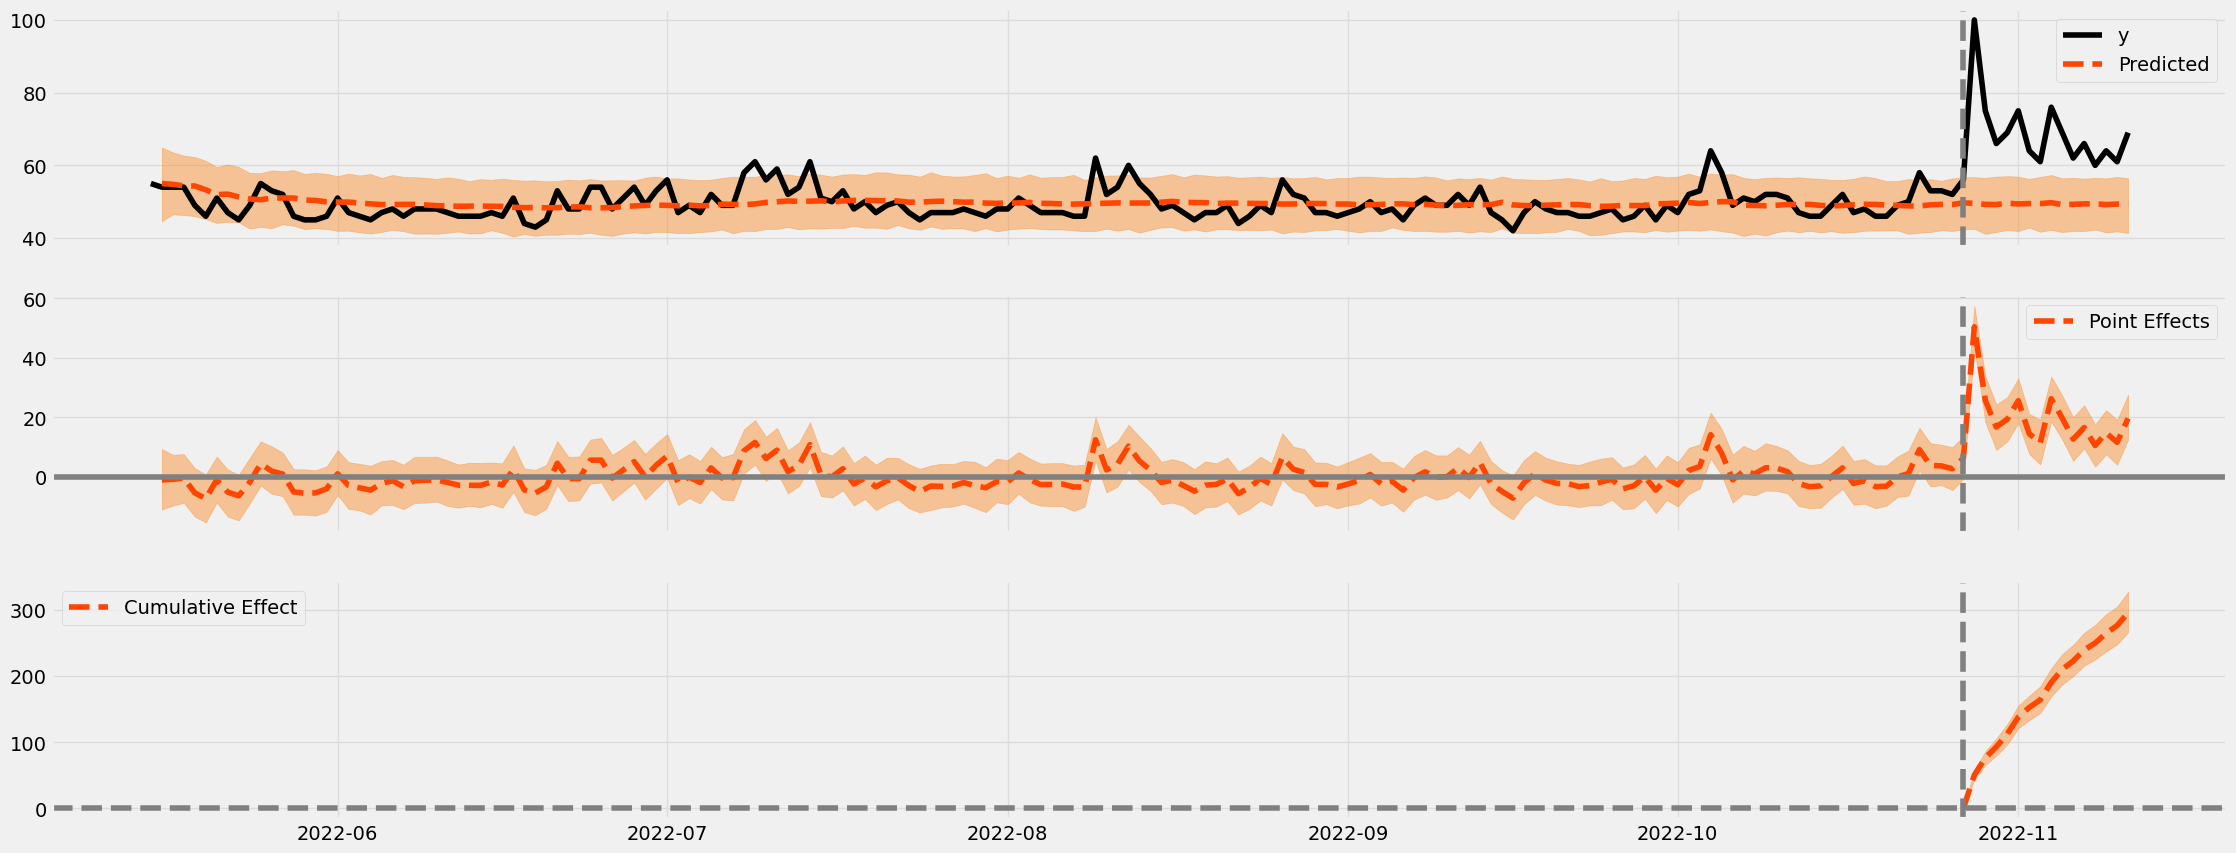

In [87]:
# Plot the model and estimated effects
ci.plot(figsize=(25, 10))

In [88]:
# Print model summary
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    69.13              1037.0
Prediction (s.d.)         49.39 (1.0)        740.88 (15.01)
95% CI                    [47.4, 51.32]      [710.99, 769.81]

Absolute effect (s.d.)    19.74 (1.0)        296.12 (15.01)
95% CI                    [17.81, 21.73]     [267.19, 326.01]

Relative effect (s.d.)    39.97% (2.03%)     39.97% (2.03%)
95% CI                    [36.06%, 44.0%]    [36.06%, 44.0%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [89]:
# Check inferences (pd.DataFrame)
ci.inferences.tail()

,complete_preds_means,complete_preds_lower,complete_preds_upper,post_preds_means,post_preds_lower,post_preds_upper,post_cum_y,post_cum_preds_means,post_cum_preds_lower,post_cum_preds_upper,point_effects_means,point_effects_lower,point_effects_upper,post_cum_effects_means,post_cum_effects_lower,post_cum_effects_upper
date,,,,,,,,,,,,,,,,
2022-11-07,49.397598,41.897736,56.335165,49.397598,41.897736,56.335165,783.0,543.575195,517.512775,567.378754,16.602402,9.664835,24.102264,239.424789,215.621246,265.487286
2022-11-08,49.431709,42.351159,56.544253,49.431709,42.351159,56.544253,843.0,593.006897,565.562160,617.927229,10.568291,3.455747,17.648841,249.993073,225.072786,277.437841
2022-11-09,49.210857,41.548668,56.409016,49.210857,41.548668,56.409016,907.0,642.217773,613.372824,669.640860,14.789143,7.590984,22.451332,264.782227,237.359200,293.627116
2022-11-10,49.346661,41.830090,56.849021,49.346661,41.830090,56.849021,968.0,691.564453,662.713676,720.007802,11.653339,4.150979,19.169910,276.435577,247.992197,305.286297
2022-11-11,49.312733,41.387216,56.431347,49.312733,41.387216,56.431347,1037.0,740.877197,709.414433,770.893520,19.687267,12.568653,27.612784,296.122833,266.106511,327.585537


In [90]:
# Print a report 
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 69.13. By contrast, in the absence of an
intervention, we would have expected an average response of 49.39.
The 95% interval of this counterfactual prediction is [47.4, 51.32].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 19.74 with a 95% interval of
[17.81, 21.73]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 1037.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 740.88. The 95% interval of this prediction is [710.99, 769.81].


The above results are given in terms of absolute numbers. In relative
terms, the response variabl

### Using Hamiltonian Monte Carlo

In [ ]:
# Fit the model using HMC
ci = CausalImpact(data, pre_period, post_period, model_args={'fit_method': 'hmc'})

In [ ]:
# Plot the model and estimated effects
ci.plot(figsize=(25, 10))

## Add custom components

In [76]:
from causalimpact.misc import standardize

normed_data, _ = standardize(data.astype(np.float32))

obs_data = tfp.sts.regularize_series(normed_data['2022-10-27':].iloc[:, 0])

linear_level = tfp.sts.LocalLinearTrend(observed_time_series=obs_data)
linear_reg = tfp.sts.LinearRegression(design_matrix=normed_data.iloc[:, 1:].values.reshape(-1, normed_data.shape[1] -1))

model = tfp.sts.Sum([linear_level, linear_reg], observed_time_series=obs_data)

pre_period = ['20220515', '20221027']
post_period = ['20221028', '20221111']

ci = CausalImpact(data, pre_period, post_period, model=model)

More examples for custom models: https://github.com/WillianFuks/tfcausalimpact/blob/master/notebooks/getting_started.ipynb

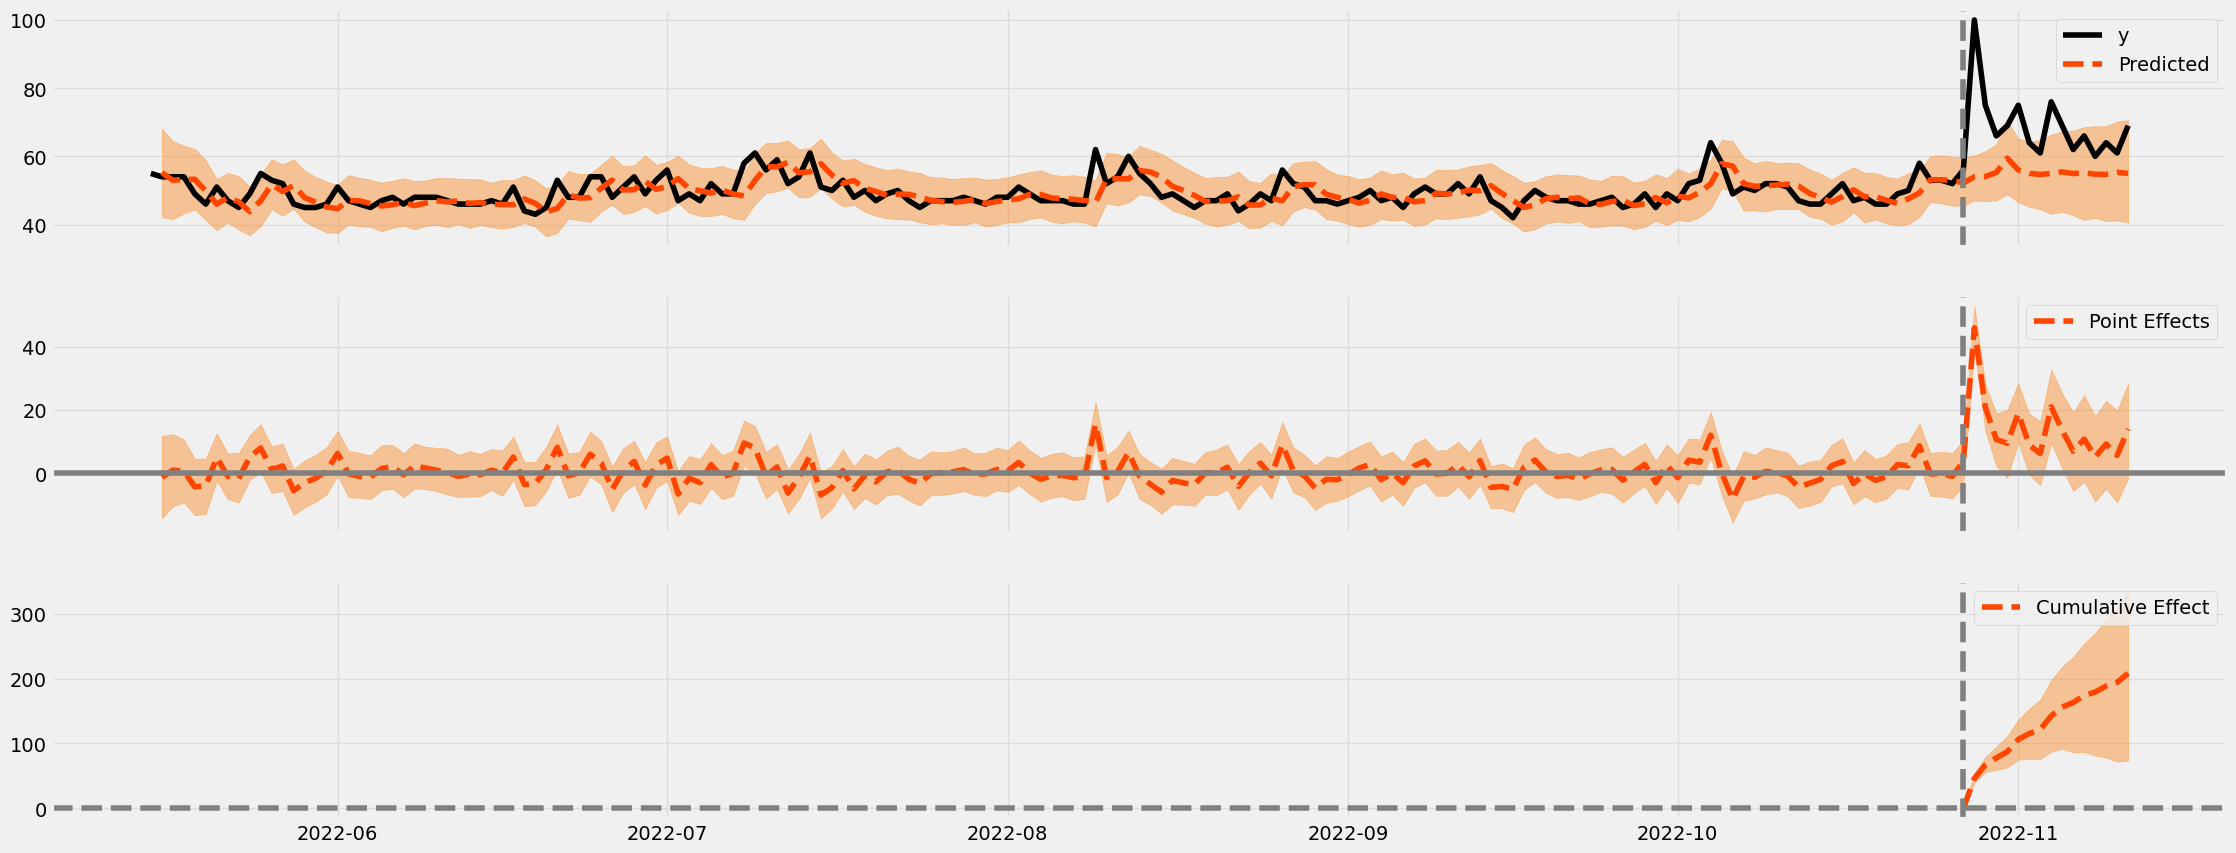

In [65]:
# Plot the model and estimated effects
ci.plot(figsize=(25, 10))

## Learn more

* Brodersen, K. (2016). [Inferring the effect of an event using CausalImpact by Kay Brodersen](https://www.youtube.com/watch?v=GTgZfCltMm8). *YouTube*. [Video]


* Cunningham, S. (2019). *Chapter 10* in [Causal Inference. The Mixtape.](https://amzn.to/44tGgKg).


* Fuks, W. (2020). [Implementing Causal Impact on Top of TensorFlow Probability](https://towardsdatascience.com/implementing-causal-impact-on-top-of-tensorflow-probability-c837ea18b126). *Medium*.


* Molak, A. (2023). *Chapter 11: Causal Inference and Machine Learning – Deep Learning, NLP, and Beyond* in [Causal Inference and Discovery in Python](https://amzn.to/44t63SR).


* Synthetic control. [*Wikipedia*](https://en.wikipedia.org/wiki/Synthetic_control_method).
 
 
* `tfcausalimpact` [documentation](https://github.com/WillianFuks/tfcausalimpact)


